<a href="https://colab.research.google.com/github/Rocknroll-nerd/statistic/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D1%8F_%D0%B8%D0%B7_%D0%B3%D0%BB%D0%B0%D0%B2%D1%8B_4%2C_8_%D0%B4%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
10!pip install arviz
!pip install pymc3 --upgrade

In [ ]:
import numpy as np
import pymc3 as pm
import arviz as az
import pandas as pd
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#4E1
какая из этих моделей - likelihood

**$𝑦_𝑖∼Normal(𝜇,𝜎)$ -- likelihood**

$𝜇∼Normal(0,10)$ -- prior(mu)

$𝜎∼Uniform(0,10)$ -- prior(sigma)

#4E2

Cколько параметров включает такое постериорное распределение

ответ: получается, у нас здесь 2 параметра $\mu$ и $\sigma$

#4E3

напишите формулу теоремы Байеса, использующую распределение выше

**$P(\mu,\sigma| y)= \frac{П_i Normal(y_i|\mu,\sigma)Normal(mu|0,10)Uniform(\sigma|0,10)}{\int \int П_i Normal(h_i|\mu,\sigma)Normal(mu|0,10)Uniform(\sigma|0,10)d\mu d\sigma}$**





#4E4
Для данной модели, какая из них является линейной

$𝑦_𝑖∼𝑁𝑜𝑟𝑚𝑎𝑙(𝜇,𝜎)  $

$\mu_i = \alpha + \beta x_i $

$\alpha ∼𝑁𝑜𝑟𝑚𝑎𝑙(0,10)$

$\beta ∼ Normal(0,1)$

$𝜎∼𝑈𝑛𝑖𝑓𝑜𝑟𝑚(0,10)  $

в данном случае линейная модель – это $𝜇𝑖=𝛼+𝛽𝑥_𝑖$

#4E5
А сколько параметров в этом постериорном распределении?

Получается, здесь 3 параметра – $\alpha$, $\beta$ и $\sigma$

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/iknyazeva/BayesData/master/Howell1.csv',sep=';', header=0)
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


#4M1

У нас есть вот такая вот модель, необходимо (тут я задумалась, как это перевести): simulate observed heights from the prior (not the posterior). 

$𝑦_𝑖∼Normal(𝜇,𝜎)$ 

$𝜇∼Normal(0,10)$


$𝜎∼Uniform(0,10)$

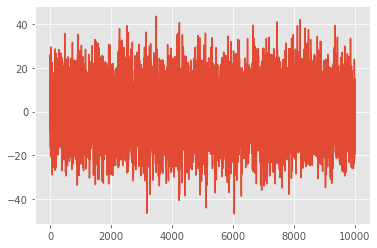

In [ ]:
sample_mu= norm.rvs(loc=0, scale=10, size=10000)
sample_sigma= uniform.rvs(loc=0, scale=10, size=10000)
prior=norm.rvs(loc=sample_mu, scale=sample_sigma)
plt.plot(prior)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


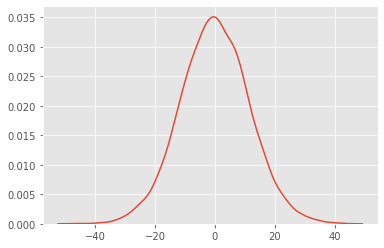

In [ ]:
import seaborn as sns
sns.kdeplot(prior)

#4M2
сделать то же самое, с помощью map, поскольку мы это не используем, значит время для pymc

In [ ]:
with pm.Model() as sim_prior:
  mu= pm.Normal('mu',0, 10)
  sigma= pm.Uniform('sigma', lower=0, upper=10)
  y=pm.Normal('y', mu, sigma)
  trace = pm.sample(1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [y, sigma, mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.
There were 141 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6650093328319426, but should be close to 0.8. Try to increase the number of tuning steps.
There were 310 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6653367252869169, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


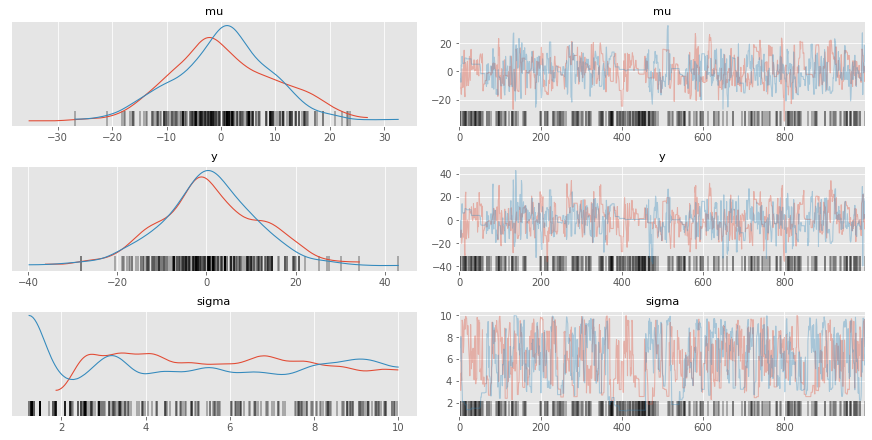

In [ ]:
az.plot_trace(trace);

#4M3

Замените код на формулы


```
flist <- alist(
  y ~ dnorm(mu, sigma),
  mu <- a + b*x,
  a ~ dnorm(0, 50),
  b ~ dunif(0, 10),
  sigma ~ dunif(0, 50)
)
```


ответ:

$y ∼ Normal(\mu,\sigma)$

$\mu_i = \alpha + \beta* x $

$\alpha ∼𝑁𝑜𝑟𝑚𝑎𝑙(0,50)$

$\beta ∼ Uniform(0,10)$

$𝜎∼𝑈𝑛𝑖𝑓𝑜𝑟𝑚(0,50)  $



#4М4


A sample of students is measured for height each year for 3 years. After the third year, you want to fit a linear regression predicting height using year as a predictor. Write down the mathematical model definition for this regression, using any variable names and priors you choose. Be prepared to defend you choice of priors.

Cначала нужно определить широкий интервал для распределения

$y ∼ Normal(\mu,\sigma)$

затем линейная модель

$\mu_i = \alpha + \beta* x $

дальше параметры 

$\alpha ∼𝑁𝑜𝑟𝑚𝑎𝑙(150,25)$, допустим средний рост будет 150 и позволим отклоняться на 25 см

$\beta ∼ Normal(4,2)$ сколько они растут за год

$𝜎∼𝑈𝑛𝑖𝑓𝑜𝑟𝑚(0,50) $ допустим, он тоже будет достаточно широким


#4М5



Теперь мы узнали что в среднем 120 см, и каждый студент растет каждый год

Можно сделать вывод, что студенты не совсем студенты, а первоклассники, например. Значит приоры мы меняем так:
$y ∼ Normal(\mu,\sigma)$

затем линейная модель

$\mu_i = \alpha + \beta* x $

дальше параметры 

$\alpha ∼𝑁𝑜𝑟𝑚𝑎𝑙(120,15)$тут наш рост с стд

$\beta ∼ Normal(6,2)$ думаю, растущий организм, значит, и расти будут выше

$𝜎∼𝑈𝑛𝑖𝑓𝑜𝑟𝑚(0,20) $ думаю, и юниформ тоже уменьшится из-за того, что в нем остались только люди школьного возраста

#4М6

Стала известна дисперсия в 64, значит значения сигмы не могут быть больше 8

Поменяем
$𝜎∼𝑈𝑛𝑖𝑓𝑜𝑟𝑚(0,8) $ 

#4H1



In [ ]:
df_h=pd.DataFrame({'ind_weight': [46.95, 43.72, 64.78, 32.59, 54.63]})
df_h['expected_height']=""
df_h['89_int']=''
df_h

,ind_weight,expected_height,89_int
0,46.95,,
1,43.72,,
2,64.78,,
3,32.59,,
4,54.63,,


Задание: заполнить предполагаемым ростом человека и интервалом hpd

In [ ]:
ind_w=df_h.ind_weight.values

In [ ]:
with pm.Model() as pred_h:
    alpha = pm.Normal('alpha', mu=150, sd=30)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = pm.Deterministic('mu', alpha + beta *ind_w ) 
    height = pm.Normal('height', mu=mu, sd=sigma, observed=ind_w)
    trace = pm.sample(2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.
There were 46 divergences after tuning. Increase `target_accept` or reparameterize.
There were 434 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5314203488978319, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [ ]:
az.summary(trace, var_names=["~mu"])

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,115.325,37.790,29.981,180.726,4.273,3.033,78.0,78.0,113.0,28.0,1.02
beta,-1.259,0.797,-2.664,0.458,0.084,0.060,90.0,90.0,111.0,28.0,1.02
sigma,31.260,10.664,13.650,49.846,1.041,0.738,105.0,105.0,104.0,30.0,1.02


In [ ]:
#что-то я запуталась на этом моменте, но вроде как это должно работать вот так
df_for_h=pm.trace_to_dataframe(trace)
df_for_h.mu__0.mean()+df_h.ind_weight[0]
df_for_h.round(2)

,alpha,beta,sigma,mu__0,mu__1,mu__2,mu__3,mu__4
0,171.02,-2.66,46.44,46.16,54.75,-1.25,84.35,25.74
1,104.34,-0.76,44.66,68.78,71.23,55.28,79.66,62.97
2,119.58,-1.15,47.77,65.50,69.22,44.96,82.04,56.65
3,106.92,-1.68,48.02,27.91,33.35,-2.09,52.08,14.99
4,96.68,-2.10,46.66,-2.07,4.72,-39.57,28.13,-18.22
...,...,...,...,...,...,...,...,...
3995,-0.00,1.00,0.00,46.95,43.72,64.78,32.59,54.63
3996,-0.00,1.00,0.00,46.95,43.72,64.78,32.59,54.63
3997,-0.00,1.00,0.00,46.95,43.72,64.78,32.59,54.63
3998,-0.00,1.00,0.00,46.95,43.72,64.78,32.59,54.63


In [ ]:
#не очень красиво как-то, но вот
df_h= df_h.assign(expected_height=[df_for_h.mu__0.mean()+df_h.ind_weight[0], df_for_h.mu__1.mean() +df_h.ind_weight[1], df_for_h.mu__2.mean()+ \
                                   df_h.ind_weight[2], df_for_h.mu__3.mean() +df_h.ind_weight[3], df_for_h.mu__4.mean() +df_h.ind_weight[4]])
df_h

,ind_weight,expected_height,89_int
0,46.95,98.401314,
1,43.72,95.746206,
2,64.78,113.057837,
3,32.59,86.597182,
4,54.63,104.714387,


#4H2


In [ ]:
df.age[df['age']<18].count()

192

In [ ]:
#возьмем все 192 человека и выберем их по весу и росту
weight_18=df.weight[df.age<18].values
height_18=df.height[df.age<18].values

In [ ]:
#теперь посмотрим по росту на среднее и sd 
height_18.mean(), height_18.std(), height_18.max(), height_18.min()

(108.31885312499999, 25.678006889965896, 158.115, 53.975)

In [ ]:
weight_18.max(), weight_18.min()

(44.735510999999995, 4.252425)

похоже что в датасете есть и малыши около двух лет

In [ ]:
#строим модель
with pm.Model() as under_18:
    alpha = pm.Normal('alpha', mu=110, sd=30)
    beta = pm.Normal('beta', mu=0, sd=50)
    sigma = pm.Uniform('sigma', lower=0, upper=60)
    mu = pm.Deterministic('mu', alpha + beta * weight_18) 
    height = pm.Normal('height', mu=mu, sd=sigma, observed=height_18)
    trace = pm.sample(2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
The acceptance probability does not match the target. It is 0.7087688398010352, but should be close to 0.8. Try to increase the number of tuning steps.


In [ ]:
az.summary(trace, var_names=["~mu"])

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,58.354,1.453,55.718,61.077,0.038,0.027,1429.0,1419.0,1422.0,1478.0,1.0
beta,2.715,0.071,2.589,2.853,0.002,0.001,1310.0,1310.0,1309.0,1680.0,1.0
sigma,8.547,0.458,7.753,9.425,0.011,0.008,1701.0,1701.0,1658.0,1248.0,1.0


получается в среднем дети из этой модели растут на 2,7 см примерно. И стандартное отклонение около 8,5 см для детей в нашем датасете. 

In [ ]:
pred = pm.sample_posterior_predictive(trace, 1000, under_18)

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1618: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


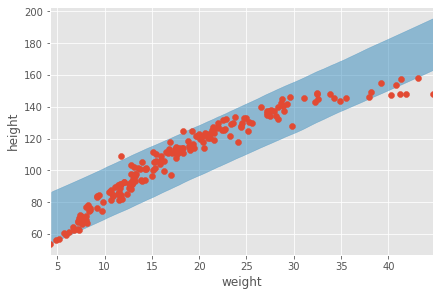

In [ ]:
height_hpd = az.hdi(pred['height'])
az.plot_hpd(weight_18, pred['height'])
plt.scatter(weight_18, height_18)
plt.xlabel('weight')
plt.ylabel('height')
plt.xlim(weight_18.min(), weight_18.max());

#4H3

Задание с логарифмами и таким распределением


$h_i ∼ Normal(\mu_i,\sigma)$

$\mu_i = \alpha + \beta* \log(w_i) $

$\alpha ∼𝑁𝑜𝑟𝑚𝑎𝑙(178,100)$

$\beta ∼ Normal(0,100)$

$𝜎∼𝑈𝑛𝑖𝑓𝑜𝑟𝑚(0,50)  $


In [ ]:
with pm.Model() as under_18_log:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=100)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = pm.Deterministic('mu', alpha + beta * np.log(weight_18))
    height = pm.Normal('height', mu=mu, sd=sigma, observed=height_18)
    trace_log = pm.sample(2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.


In [ ]:
az.summary(trace_log, var_names=["~mu"])

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-32.775,1.939,-36.411,-28.989,0.060,0.043,1030.0,1030.0,1041.0,1096.0,1.0
beta,50.504,0.681,49.267,51.879,0.021,0.015,1036.0,1036.0,1048.0,1121.0,1.0
sigma,4.701,0.242,4.248,5.160,0.006,0.004,1912.0,1903.0,1915.0,1564.0,1.0


теперь дети растут на 50 см в килограмм

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1618: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)
/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


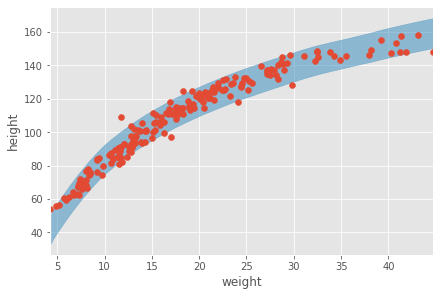

In [ ]:
log = pm.sample_posterior_predictive(trace_log, 1000, under_18_log)

height_pred_hpd = az.hpd(log['height'])
az.plot_hpd(weight_18, log['height'])
plt.scatter(weight_18, height_18)
plt.xlabel('weight')
plt.ylabel('height')
plt.xlim(weight_18.min(), weight_18.max());

похоже эта модель и правда подходит лучше